# FIT5149 S1 2019 Assessment 1: Choosing and Explaining Likely Caravan Insurance Customers


Programming Language: R 3.5.3 in Jupyter Notebook

R Libraries used:
- ggplot2
- MASS
- PRROC
- ROSE
- randomForest
- glmnet
- lattice

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

The dataset given in the problem is from a Car Insurance policy company. This data specifically is about the people who bought or dint buy a Caravan insurance policy. Each person has 85 different attributes, which are explored further in the below sections, which describe a person and whether the person bought the policy or not. 

The dataset contains 3 files as described below:
* TICDATA2000.txt : This contains the training data for 5822 customers, and each row has 86 columns, wherein the 86th column is a boolean representing whether the person bought the policy or not. This data will be used to train the model. 

* TICEVAL2000.txt : This is the validation dataset for 4000 customers, containing 85 columns. This would be used to evaluate the performance of the models built. 

* TICTGTS2000.txt : This data contains the true labels for the validation dataset and will be used to measure the performance of the model. 


The task is to explore the attributes about the customers, and identify the patterns to identify the customers better for a good marketting strategy. A prediction also has to be made on the validation dataset and pick the top 800 customers based on the probabilities and check how many actually bought out of the set. This in Machine Learning terms can be understood as calculating recall for top 800 customers. 

We would be needing the below libraries for the code written. Lets import them first. 

In [1]:
library(ggplot2)
library(MASS)
library(PRROC)
library(ROSE)
library(randomForest)
library(glmnet)
library(lattice)

Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'MASS' was built under R version 3.5.3"Warning message:
"package 'PRROC' was built under R version 3.5.3"Warning message:
"package 'ROSE' was built under R version 3.5.3"Loaded ROSE 0.0-3


Attaching package: 'ROSE'

The following object is masked from 'package:PRROC':

    roc.curve

Warning message:
"package 'randomForest' was built under R version 3.5.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'glmnet' was built under R version 3.5.3"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.5.3"Loaded glmnet 2.0-16



## 2. Data Exploration<a class="anchor" id="sec_2"></a>

Lets start by reading the data into a Data Frame and assign column names to the data frame as the data does not contain the column names. 

Assumption: All the input files are kept in the same directory as this jupyter notebook

In [2]:
df_car <- read.csv('ticdata2000.txt', header = FALSE, sep = '\t')
names(df_car) <- c('MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF',
                   'MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE',
                   'MRELGE','MRELSA','MRELOV','MFALLEEN','MFGEKIND',
                   'MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG',
                   'MBERZELF','MBERBOER','MBERMIDD','MBERARBG','MBERARBO',
                   'MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP',
                   'MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30',
                   'MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM',
                   'MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT',
                   'PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR',
                   'PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG',
                   'PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS',
                   'PINBOED','PBYSTAND','AWAPART','AWABEDR','AWALAND',
                   'APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG',
                   'ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG',
                   'AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED',
                   'ABYSTAND','CARAVAN')

Lets have a look at the dimension of the dataset. The following command tells us the rows and columns respectively.

In [3]:
dim(df_car)

[1] 5822   86

Sneak peek on the first few rows with head.

In [4]:
head(df_car)

MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


We can quickly look at the summary of all the columns as well to get an overall picture, before we dive into our variables.

In [5]:
summary(df_car)

    MOSTYPE         MAANTHUI         MGEMOMV         MGEMLEEF    
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
    MOSHOOFD          MGODRK           MGODPR          MGODOV    
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.774   Mean   :0.6965   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
     MGODGE          MRELGE          MRELSA           MRELOV    
 Min.   :0.

The below commans is just to set the size of plots that are used for visualisation. 

In [6]:
options(repr.plot.width = 5, repr.plot.height = 5)

To start, lets see the distribution of the target variable. 


   0    1 
5474  348 

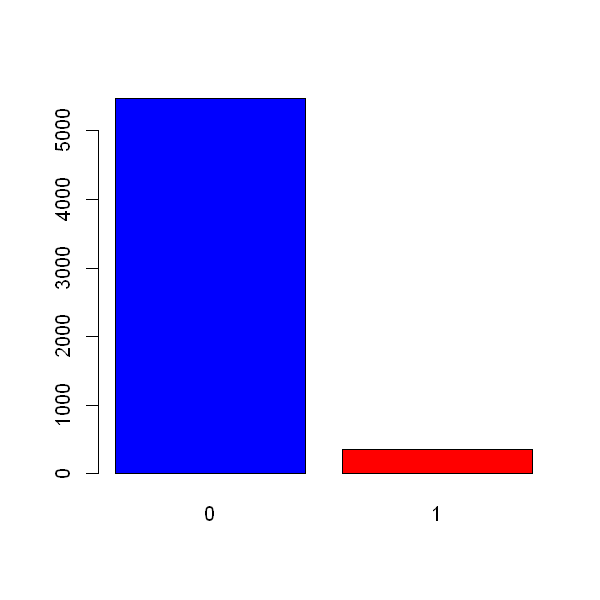

In [7]:
table(df_car$CARAVAN)
barplot(table(df_car$CARAVAN), col=c("blue","red"))

That's quite an imbalanced data that we are dealing with. The number of positive cases are just 5.9% in the data. It would be a challenge to tackle with such a data, but their are ways to tackle that and they are explaind in further sections. 

Lets start with exploring the features. To start, we look at the correlation of all the variables amongst themselves. 

In [8]:
cor(df_car)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
MOSTYPE,1.000000000,-0.038721258,-0.021996966,0.009454422,0.992671874,-0.193613010,0.09039908,-0.025642336,-0.019504734,-0.065595774,...,0.0217073867,-0.0120597787,-0.0029094232,-0.0115121130,0.0078009434,-0.0181616379,-0.015773558,-0.0210874196,-0.053717567,-0.069385237
MAANTHUI,-0.038721258,1.000000000,0.010102243,0.056974604,-0.045816774,-0.006136360,-0.02436018,0.012056027,0.020540166,0.023024578,...,0.0033205607,0.0094435174,-0.0163329939,0.0006545495,-0.0061891407,0.0006662173,-0.020993273,0.0183037932,-0.004166222,-0.009809028
MGEMOMV,-0.021996966,0.010102243,1.000000000,-0.328257249,0.016115371,0.013105189,0.04935646,-0.108649617,-0.005527394,0.534797785,...,-0.0001283250,0.0167597277,0.0187492290,-0.0092689689,0.0092343649,0.0006443739,0.030330056,0.0259066857,0.028383762,0.035573157
MGEMLEEF,0.009454422,0.056974604,-0.328257249,1.000000000,0.003872334,-0.037518737,0.09365402,0.057737161,-0.119966338,-0.040383808,...,0.0210701969,-0.0017470283,0.0006444196,0.0244168979,0.0002441930,-0.0017913964,0.020611609,-0.0200420361,-0.014539744,0.004490697
MOSHOOFD,0.992671874,-0.045816774,0.016115371,0.003872334,1.000000000,-0.199186199,0.09849256,-0.034565811,-0.021465787,-0.026618553,...,0.0239757042,-0.0100041462,-0.0022434628,-0.0123720038,0.0070986454,-0.0206830450,-0.017990254,-0.0209970072,-0.051723141,-0.069299830
MGODRK,-0.193613010,-0.006136360,0.013105189,-0.037518737,-0.199186199,1.000000000,-0.37276739,0.021125102,-0.063904415,-0.028594440,...,-0.0084496474,0.0053862951,-0.0128432499,0.0019283957,-0.0006751743,0.0117945560,-0.001502914,-0.0114309114,-0.004008778,0.006225424
MGODPR,0.090399085,-0.024360178,0.049356463,0.093654020,0.098492561,-0.372767392,1.00000000,-0.317548571,-0.741894511,0.147256295,...,-0.0143545843,0.0039492314,0.0039747163,0.0463522124,0.0137600087,0.0184678037,0.001906471,0.0023918343,0.016657867,0.032866330
MGODOV,-0.025642336,0.012056027,-0.108649617,0.057737161,-0.034565811,0.021125102,-0.31754857,1.000000000,-0.139306355,-0.125703467,...,0.0065716077,-0.0055693135,0.0176955827,0.0063015379,-0.0238772539,0.0094173615,0.025661055,-0.0097344391,0.010127307,0.004039404
MGODGE,-0.019504734,0.020540166,-0.005527394,-0.119966338,-0.021465787,-0.063904415,-0.74189451,-0.139306355,1.000000000,-0.107899577,...,0.0088443705,0.0042418594,-0.0041392047,-0.0526046474,-0.0084119000,-0.0264073491,-0.011121966,0.0072612796,-0.027291255,-0.041706886
MRELGE,-0.065595774,0.023024578,0.534797785,-0.040383808,-0.026618553,-0.028594440,0.14725629,-0.125703467,-0.107899577,1.000000000,...,0.0115124386,0.0223758364,0.0116780108,-0.0079785097,0.0097105773,-0.0015655294,0.020921355,-0.0034195098,0.036568846,0.070263828


Whoa!! That's a big(85 x 85) table to get some insights from. Lets depict this pictorially. 

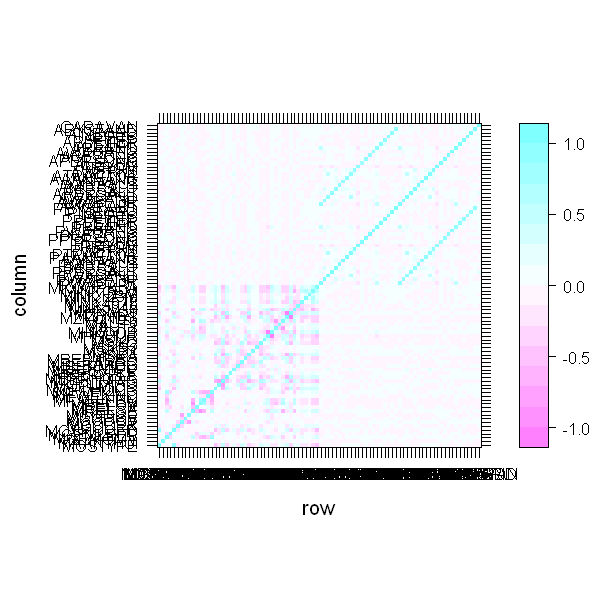

In [9]:
levelplot(cor(df_car))

Althugh, the column names are not quite visible properly, but the plot is more informative than the previous matrix. 

One Key information from the plot is that there is high correlation between variables from column index 44-64 to 65:85.  

Lets plot them below separately to see. 

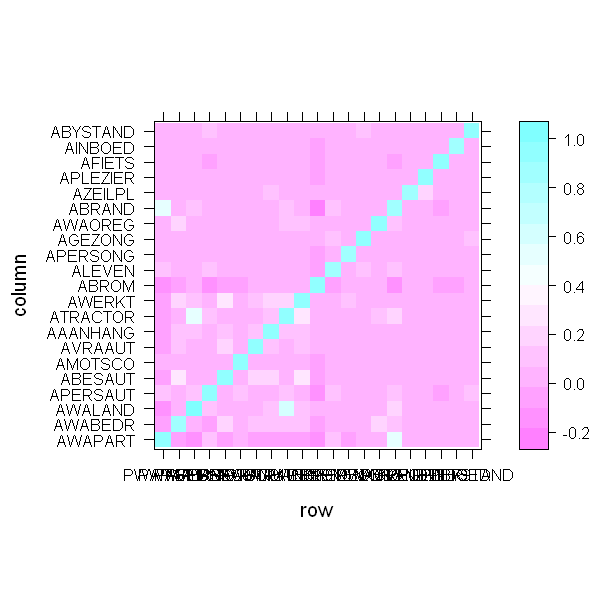

In [10]:
levelplot(cor(df_car[,44:64], df_car[,65:85]))

The blue diagonal line, proves our hypothesis that they are highly correlated. Lets see what the description of these variables are for a few of them.

Column 44 - PWAPART: Contribution private third party insurance

Column 65 - AWAPART: Number of private third party insurance

Now, these two variable have a very high correlation and it makes sense because, if a person contributes more to a third party insurance, then he/she would have more number of third party insurance as well. 

This is just one example but this is the case with all the other pairs that are seen to have high correlation. 

And hence we keep only one set of them. 

In [11]:
df_selected <- df_car[,c(1:64, 86)]
dim(df_selected)

[1] 5822   65

The above code selects the needed variable and the data has been reduced to 65 columns now. 

Now lets have a look at some of the variables that we are left with. 

Variable - MOSTYPE - Customer Subtype

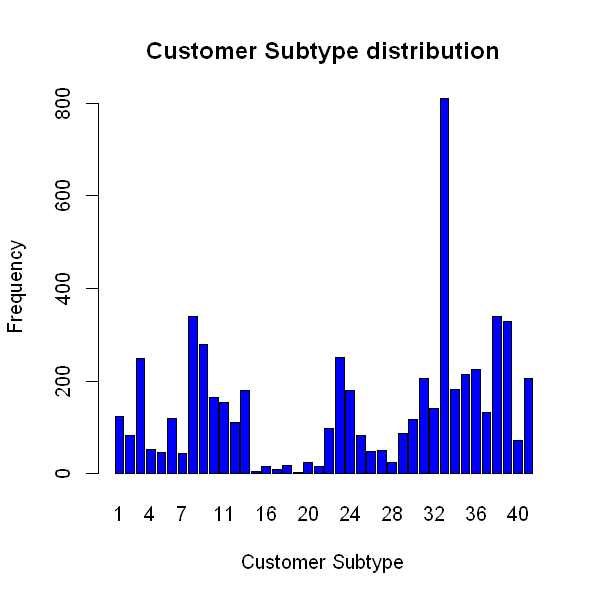

In [12]:
barplot(table(df_selected$MOSTYPE),col=c("Blue"), xlab="Customer Subtype", ylab = "Frequency",
       main="Customer Subtype distribution")

We see that the highest sumber of Customer Subtype is 33, which upon looking on data dictionary we find that belong to "Lower class large families". 

Variable - MGEMLEEF - Average Age

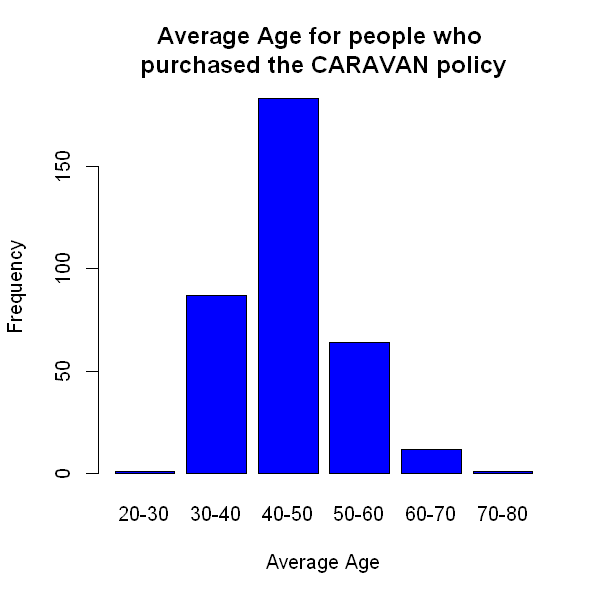

In [13]:
data <- table(df_selected[df_selected$CARAVAN==1,][, c("MGEMLEEF")])
names(data)=c("20-30","30-40","40-50","50-60","60-70","70-80")
barplot(data, col=c("Blue"), xlab="Average Age", ylab = "Frequency",
       main="Average Age for people who 
purchased the CARAVAN policy")

With this we see that there is a big chunk of people in the age of 40-50. 

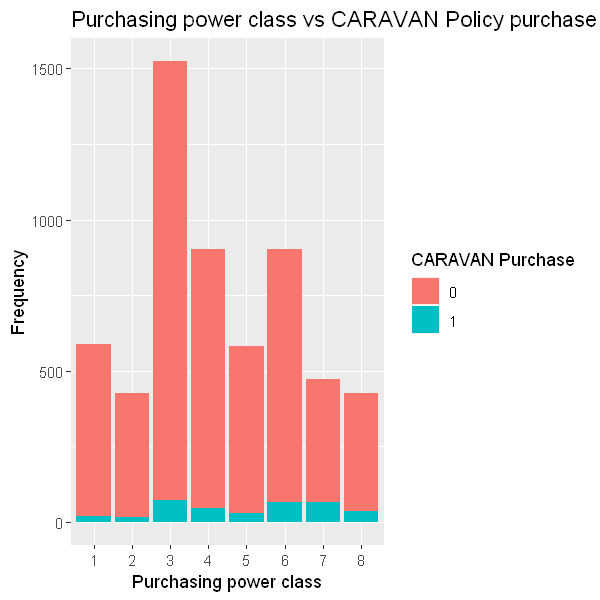

In [14]:
ggplot(df_selected, aes(x=as.factor(MKOOPKLA), fill=as.factor(CARAVAN)), fill=CARAVAN) +
geom_bar() +ylab("Frequency") +
xlab("Purchasing power class") + 
ggtitle("Purchasing power class vs CARAVAN Policy purchase") +
scale_fill_discrete(name = "CARAVAN Purchase")

This shows that there are more people in 3,6,7 classes who purchase policy than the others.

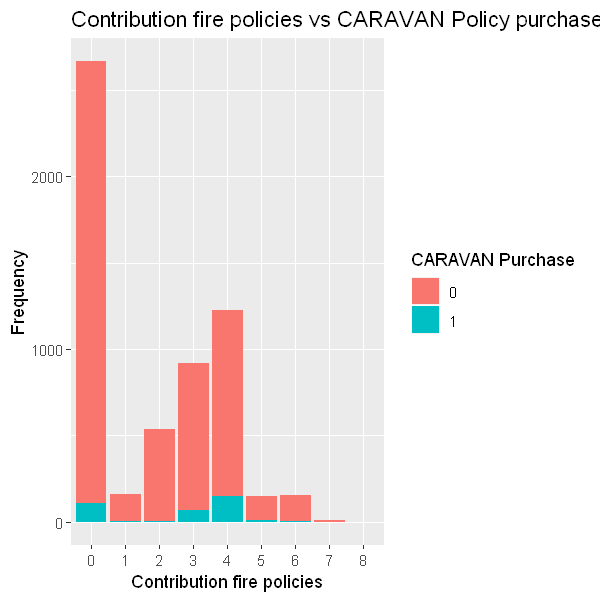

In [15]:
ggplot(df_selected, aes(x=as.factor(PBRAND), fill=as.factor(CARAVAN)), fill=CARAVAN)+
geom_bar() +ylab("Frequency") +
xlab("Contribution fire policies") + 
ggtitle("Contribution fire policies vs CARAVAN Policy purchase") +
scale_fill_discrete(name = "CARAVAN Purchase")

## 3. Model Development<a class="anchor" id="sec_3"></a>

To start the model development, first the data is divided into training and test set. We do that with the below piece of code. 

In [16]:
set.seed(1234)
#75% trainng and 25% data for testing
bound <- floor(0.75 * nrow(df_selected))
df <- df_selected[sample(nrow(df_selected)), ]           #sample rows 
df.train <- df[1:bound, ]              #get training set
df.test <- df[(bound+1):nrow(df), ] 

In [17]:
print(dim(df.train))
print(dim(df.test))

[1] 4366   65
[1] 1456   65


Now we need to pick out the features that are relavant to the target. First, we look at the correlation of all the feature variable against the target variable. 

In [18]:
apply(cor(df_selected, df_selected$CARAVAN), 2, sort)

MOPLLAAG,-0.0905613304
MINKM30,-0.0797651169
MHHUUR,-0.0791434984
MAUT0,-0.0765007839
MOSTYPE,-0.0693852373
MOSHOOFD,-0.0692998304
MSKD,-0.0630702655
MRELOV,-0.0622853593
MZFONDS,-0.0583778481
MBERARBO,-0.0546323865
MBERBOER,-0.0540025663


With the below code, we see that the correlation is quite week aginst the target and hence perform a cross-validation experiment to find the right threshold for correlation.

Below, some of the utility functions are defined to make the process simple and modular. 

In [19]:
get_corelated_feature <- function(data, corr){
    # Computes the list of variables having a minimum correlation.
    #
    # Args:
    #   data: Data on which correlation needs to be calculated
    #   corr: Correlation threshold to be considered
    #
    # Returns:
    #   Vector with variable names within the correlation threshold. 
    l <- c()
    i <- 1
    for (cc in cor(data, data$CARAVAN)){
    
    if(abs(cc)>corr){
        l <- append(l,i)
        }
    i <- i + 1
}
    return(l)
}

In [20]:
fit_glm_cv_func <- function(data, corr_thresh=NULL){
    # Performs cross-validation on the data and returns the mean of relavant metrics. 
    #
    # Args:
    #   data: Data on which model needs to be build and cross-validated.
    #   thresh: Optional parameter to consider the correlation threshold. 
    #
    # Returns:
    #   List containing the necessary metrics
    
    set.seed(41)
    
    #Check for the optional parameter
    if(missing(corr_thresh)){
        yourData<-data[sample(nrow(data)),]
    }
    else{
        feat <- get_corelated_feature(data, corr_thresh)
        yourData<-data[sample(nrow(data)),feat]        
    }

   
    #Create 5 equally size folds
    folds <- cut(seq(1,nrow(yourData)),breaks=5,labels=FALSE)
    
    roc_list <- c()
    pr_list <- c()
    err_rate_list <- c()
    rec_list <- c()
    prec_list <- c()
    
    #fit the model on one part and train on the rest part for cross-validation.
    for(i in 1:5){
        #Segement your data by fold using the which() function 
        testIndexes <- which(folds==i,arr.ind=TRUE)
        testData <- yourData[testIndexes, ]
        trainData <- yourData[-testIndexes, ]
        
        fit.glm <- glm(CARAVAN ~ ., data = trainData, family = "binomial")
        probs <- predict(fit.glm, newdata = testData, type="response")
        ret <- summary_func(probs, testData$CARAVAN, 0.5, FALSE)
        roc_list <- append(roc_list, ret$roc)
        pr_list <- append(pr_list, ret$pr)
        err_rate_list <- append(err_rate_list, ret$err_rate)
        rec_list <- append(rec_list, ret$recall)
        prec_list <- append(prec_list, ret$precision)
    }
      
    return(list("roc"=mean(roc_list), "pr"=mean(pr_list), 
                "recall"=mean(rec_list, na.rm=TRUE), 
                "err_rate"=mean(err_rate_list), 
                "precision"=mean(prec_list, na.rm=TRUE)))
    
}

In [21]:
summary_func <- function(probs, labels, prob_thresh, verbose){
    # Gives the summary of the model given the probabilities and true labels.
    #
    # Args:
    #   probs: probabilities from prediction
    #   label: True labels 
    #   prob_thresh: probability threshold to be used for making a p
    #                rediction positive
    #   verbose: to see if details needs to be printed. 
    #
    # Returns:
    #   List containing the necessary metrics
  
    test.true <- labels
    pred <- rep(0, length(probs))
    pred[probs > prob_thresh] <- 1
    
    fg <- probs[test.true == 1]
    bg <- probs[test.true == 0]
    
    conf <- table(pred, test.true)
    if(verbose == TRUE){
        print(conf)
    }
    
    #calculate the relavant metrics
    recall <- length(pred[(pred == 1) & (test.true == 1)])/length(test.true[test.true == 1])
    precision <- length(pred[(pred == 1) & (test.true == 1)])/length(pred[pred == 1])
    roc <- PRROC:::roc.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    pr <- pr.curve(scores.class0 = fg, scores.class1 = bg, curve = T)
    err_rate <- mean(pred != test.true)
    
    #print details only if verbose is true
    if(verbose == TRUE){
        cat("ROC AUC score is", roc$auc, "\n")
        cat("P-R AUC is", pr$auc.integral, "\n")
        cat("Recall is", recall, "\n")
        cat("Precision is", precision, "\n")
        cat("Error rate is", err_rate, "\n")
    }
   
    if(verbose == TRUE){
        plot(roc)
        plot(pr)
    }
    
    #return multiple items and hence a list
    return(list("roc"=roc$auc, "pr"=pr$auc.integral, 
                "recall"=recall, "err_rate"=err_rate, 
                "precision"=precision))
}

Now, using the above functions, we would first do cross-validation on the various probability thresholds and the above functions would be reused all over the rest of the code. 

In [22]:
tab <- matrix(NA,ncol=6,nrow=4)
colnames(tab) <- c("Correlation Threshold", 
                   "ROC_AUC", "PR_AUC", "Recall", 
                   "Error rate", "Precision")
len <- 1
for (corr in c(0.05, 0.06, 0.07, 0.08)){
    
    ret <- fit_glm_cv_func(df.train, corr)
    tab[len,] <- c(corr, ret$roc, ret$pr, ret$recall, ret$err_rate, ret$precision)
    len <- len + 1
        
}
print(tab)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

     Correlation Threshold   ROC_AUC    PR_AUC      Recall Error rate Precision
[1,]                  0.05 0.7387883 0.1597465 0.012403467 0.05863628 0.3888889
[2,]                  0.06 0.7408187 0.1638789 0.012403467 0.05863628 0.3888889
[3,]                  0.07 0.7426557 0.1682026 0.008699764 0.05886538 0.2222222
[4,]                  0.08 0.7360955 0.1722225 0.008699764 0.05886538 0.2222222


Based on the above table, the observation that we make is there is not much of a difference between different correlation threshold. One of the major reason for that is that the data is highly imbalanced which makes the model to be too conservative and the number of data points predicted to be positive is way too less to make an effect on these metrics. 

There is nothing much to take here but we can have a closer look at the metrics for threshold=0.06 because that seem to be doing the best in all the metrics. 

In [23]:
feat <- get_corelated_feature(df.train, 0.06)
df_sel <- df.train[sample(nrow(df.train)),feat] 
print(dim(df_sel))

[1] 4366   25


We see that there are 24 features and the label column is picked based on the 0.06 threshold of correlation. 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

    test.true
pred    0    1
   0 1362   93
   1    0    1
ROC AUC score is 0.7542881 
P-R AUC is 0.1944586 
Recall is 0.0106383 
Precision is 1 
Error rate is 0.06387363 


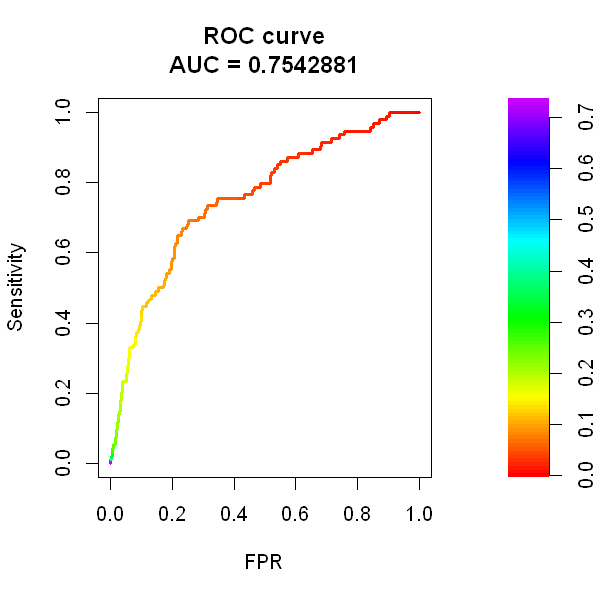

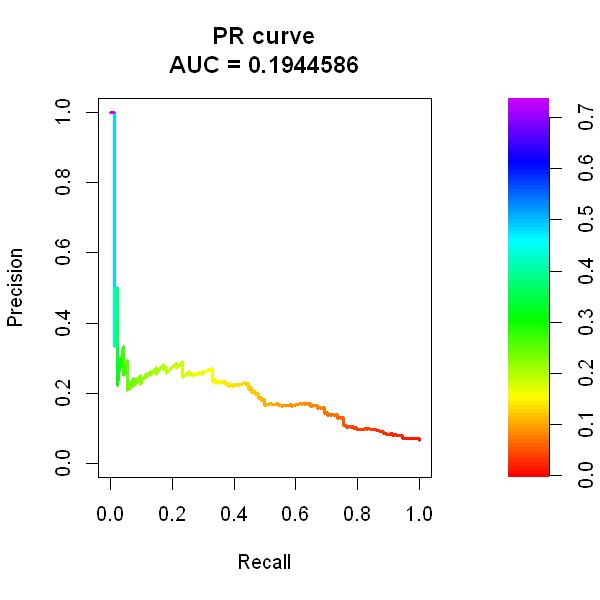

In [24]:
fit.glm.corr <- glm(CARAVAN ~ ., data = df_sel, family = "binomial")
probs <- predict(fit.glm.corr, newdata = df.test, type="response")
ret <- summary_func(probs, df.test$CARAVAN, 0.5, TRUE)

So, as expected, the model doesn't do so well on the test data, although the ROC-AUC is decent. Based on the confusion matrix, there is just one data point which is predicted to be positive, which is too less. 

Precision Recall curve has also been plotted because it helps in judging the model on imbalanced data. (Relavant research paper in References)

Since the correlation cross-validation dint work so well, lets try a step-wise model to do the feature selection. 

In [25]:
full.model <- glm(CARAVAN ~., data = df.train, family="binomial")
step.model <- suppressWarnings(stepAIC(full.model, 
                                       direction = "backward", 
                                       trace = FALSE))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Based on the stepwise backward selection, below are the variables picked up by it.

In [26]:
step.model$formula

CARAVAN ~ MGEMLEEF + MGODPR + MFGEKIND + MOPLMIDD + MOPLLAAG + 
    MSKA + MSKB1 + MSKB2 + MSKD + MHHUUR + MHKOOP + MAUT1 + MINKM30 + 
    MINK3045 + MINK4575 + MINK7512 + MINKGEM + PWABEDR + PWALAND + 
    PPERSAUT + PWAOREG + PBRAND + PPLEZIER + PFIETS

    test.true
pred    0    1
   0 1362   93
   1    0    1
ROC AUC score is 0.7303793 
P-R AUC is 0.1531654 
Recall is 0.0106383 
Precision is 1 
Error rate is 0.06387363 


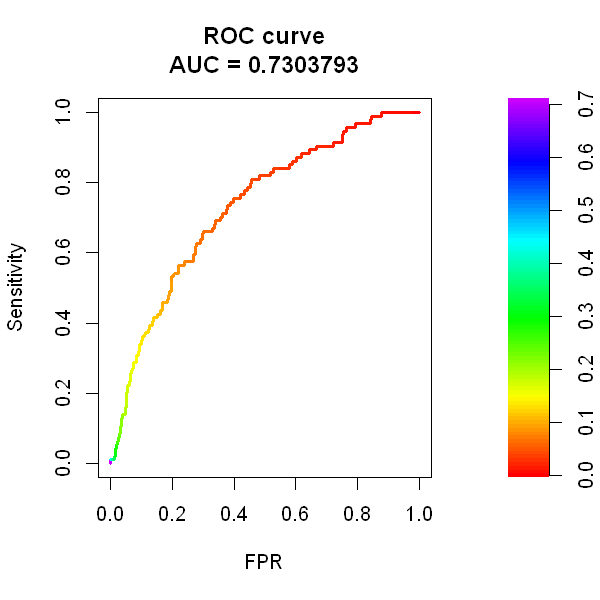

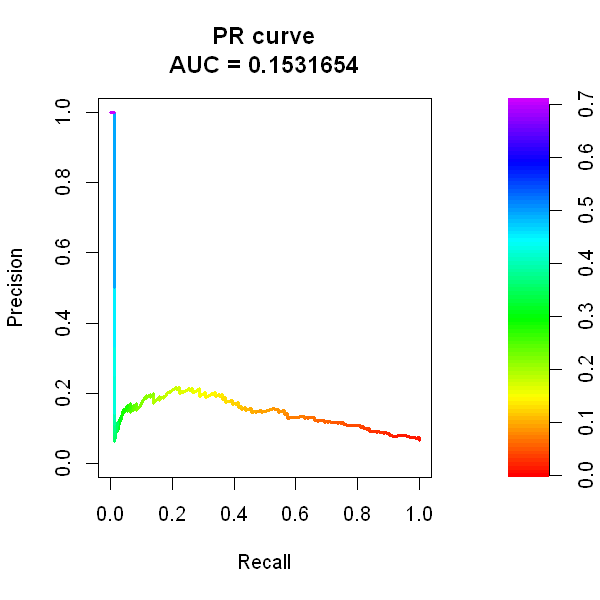

In [27]:
fit.glm.step <- glm(step.model$formula, data = df.train, family = "binomial")
probs <- predict(fit.glm.step, newdata = df.test, type="response")
ret <- summary_func(probs, df.test$CARAVAN, 0.5, TRUE)

Even this model is suffering from the imbalanced problem since its not predicting a lot of positives. But we still keep this model and we will compare this on the validation data and see how it performs. 

Lets try fitting an LDA model as well on the selected features and compare them against each other. 

    test.true
pred    0    1
   0 1357   92
   1    5    2
ROC AUC score is 0.7329881 
P-R AUC is 0.1502852 
Recall is 0.0212766 
Precision is 0.2857143 
Error rate is 0.06662088 


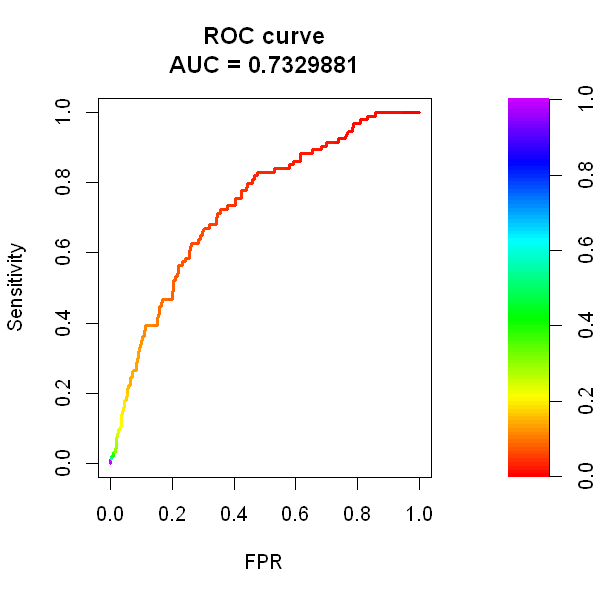

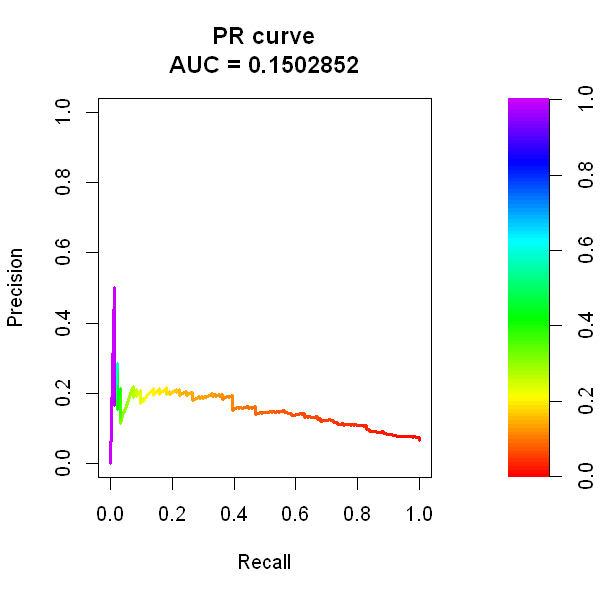

In [28]:
fit.lda.step <- lda(step.model$formula, data = df.train, family = "binomial")
probs <- predict(fit.lda.step, df.test)$posterior[,2]
ret <- summary_func(probs, df.test$CARAVAN, 0.5, TRUE)

Performs slightly better than the base gl model, but still has a very low recall. 

Since the data is imbalanced, the probability threshold of 0.5 seems to be too high, lets do an experiment by changing that and seeing the performance of the model. 

In [29]:
fit.glm.prob.thresh <- glm(CARAVAN ~ ., data = df_sel, family = "binomial")
probs <- predict(fit.glm.prob.thresh, newdata = df.test, type="response")

tab <- matrix(NA,ncol=6,nrow=6)
colnames(tab) <- c("Probability Threshold", "ROC_AUC", 
                   "PR_AUC", "Recall", "Error rate", "Precision")
len <- 1

for (p_thresh in c(0.5, 0.4, 0.3, 0.2, 0.15, 0.1)){
    ret <- summary_func(probs, df.test$CARAVAN, p_thresh, FALSE)
    tab[len,] <- c(p_thresh, ret$roc, ret$pr, ret$recall, 
                   ret$err_rate, ret$precision)
    
    len <- len + 1
}
print(tab)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

     Probability Threshold   ROC_AUC    PR_AUC    Recall Error rate Precision
[1,]                  0.50 0.7542881 0.1944586 0.0106383 0.06387363 1.0000000
[2,]                  0.40 0.7542881 0.1944586 0.0106383 0.06524725 0.3333333
[3,]                  0.30 0.7542881 0.1944586 0.0212766 0.06799451 0.2222222
[4,]                  0.20 0.7542881 0.1944586 0.1595745 0.08241758 0.2678571
[5,]                  0.15 0.7542881 0.1944586 0.3404255 0.11332418 0.2370370
[6,]                  0.10 0.7542881 0.1944586 0.5319149 0.19986264 0.1683502


Now, based on this we see that the recall increases as we decrease the threshold but the precision decreases.

For now, we pick the threshold of 0.15 since it gives a balance between the threshold of precision and recall. 

Another way of variable selection could be, by fitting a Random forest model on entire data and then using the variables out of its feature importance. Lets give that a try. 

In [30]:
fit.rf <- randomForest(as.factor(CARAVAN)~., df.train,ntree=100)
fit.rf


Call:
 randomForest(formula = as.factor(CARAVAN) ~ ., data = df.train,      ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 8

        OOB estimate of  error rate: 6.5%
Confusion matrix:
     0  1 class.error
0 4075 37 0.008998054
1  247  7 0.972440945

Now the following code gives the importance of the variables in decreasing order of importance. 

In [31]:
apply(fit.rf$importance, 2, sort, decreasing = TRUE)

,MeanDecreaseGini
PPERSAUT,19.998387
PBRAND,18.411592
MOSTYPE,16.054320
PWAPART,11.965570
MKOOPKLA,9.565796
MOSHOOFD,8.879234
MSKC,8.696840
MBERARBG,8.600520
MGODPR,8.558441
MOPLMIDD,8.483859


For our analysis, we pick the top 25 variables using the below code. 

In [32]:
rf_feat <- rownames(apply(fit.rf$importance, 2, sort, decreasing = TRUE))[1:25]
rf_feat

[1] "PPERSAUT" "PBRAND"   "MOSTYPE"  "PWAPART"  "MKOOPKLA" "MOSHOOFD"
 [7] "MSKC"     "MBERARBG" "MGODPR"   "MOPLMIDD" "MOPLHOOG" "PPLEZIER"
[13] "MINK3045" "MBERMIDD" "MFGEKIND" "MGODGE"   "MFWEKIND" "MBERARBO"
[19] "MINK4575" "MOPLLAAG" "MBERHOOG" "MHKOOP"   "MINKM30"  "MSKA"    
[25] "MINK7512"

    test.true
pred    0    1
   0 1360   93
   1    2    1
ROC AUC score is 0.7358703 
P-R AUC is 0.1656308 
Recall is 0.0106383 
Precision is 0.3333333 
Error rate is 0.06524725 


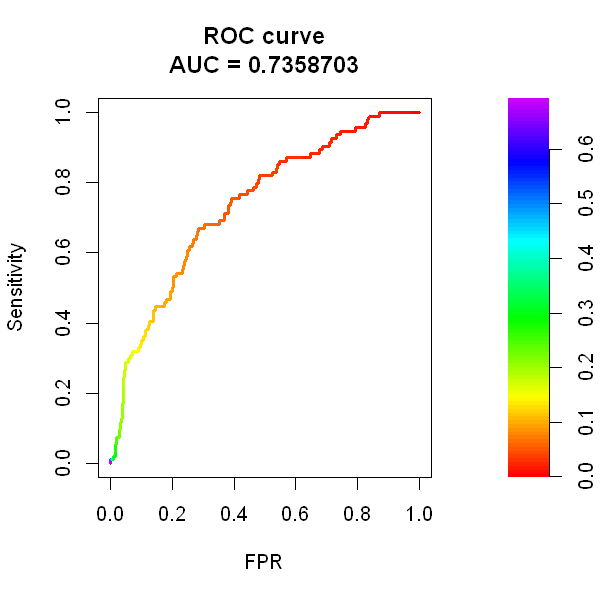

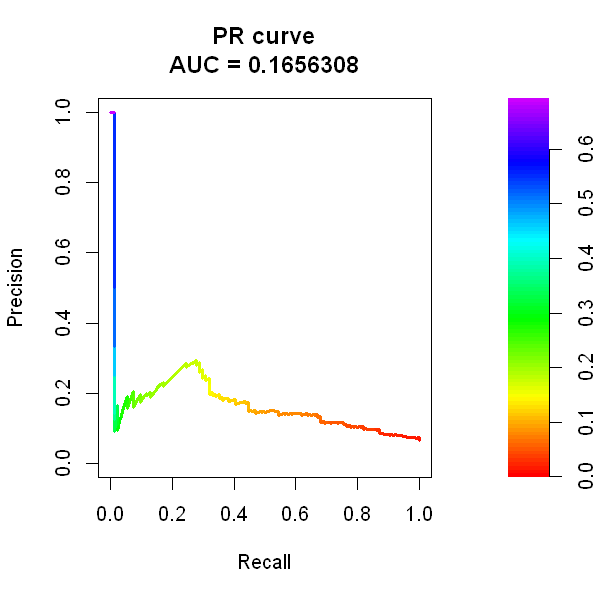

In [33]:
df_rf_train <- df.train[c(rf_feat, "CARAVAN")]
df_rf_test <- df.test[c(rf_feat)]
fit.glm.rf <- glm(CARAVAN ~ . , data = df_rf_train, family = "binomial")
probs <- predict(fit.glm.rf, newdata = df_rf_test, type="response")
ret <- summary_func(probs, df.test$CARAVAN, 0.5, TRUE)

This performs slightly better than the base glm method with the probability threshold of 0.5

Now, since the key road block for this problem has been the imbalance nature of it, lets try to get to the root cause and sample the data in a way to balance it more. Here, we explore a library called 'ROSE' to synthetically generate the dataset for the minority class. It can be done using the below code. The sampling is done to get a 70-30 ratio as shown below. 

In [34]:
data.rose <- ROSE(CARAVAN~., data=df.train, seed=3, p=0.3)$data
table(data.rose$CARAVAN)


   0    1 
3059 1307 

    test.true
pred    0    1
   0 1257   68
   1  105   26
ROC AUC score is 0.7448839 
P-R AUC is 0.1590687 
Recall is 0.2765957 
Precision is 0.1984733 
Error rate is 0.1188187 


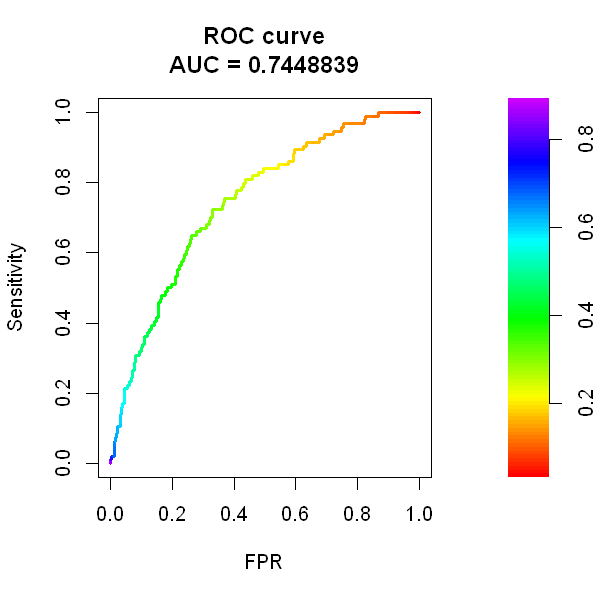

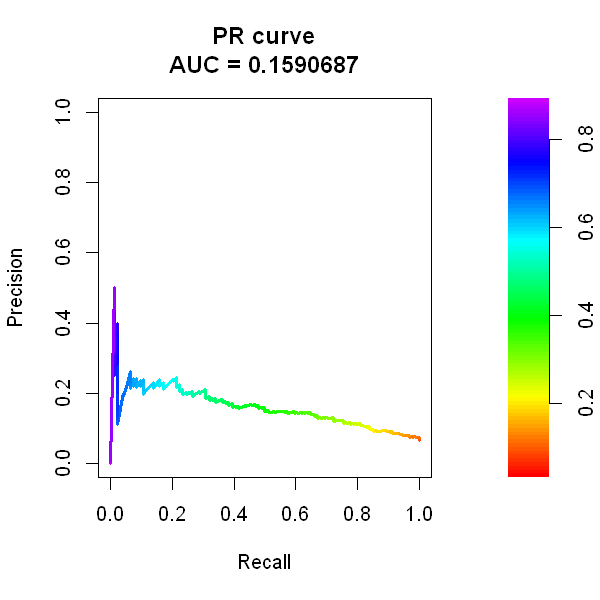

In [35]:
fit.glm.rose <- glm(CARAVAN ~ . , data = data.rose, family = "binomial")
probs <- predict(fit.glm.rose, newdata = df.test, type="response")
ret <- summary_func(probs, df.test$CARAVAN, 0.5, TRUE)

This model performs quite good on the test data as well. It has a better ROC AUC, PR AUC and a good recall as well. 

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

Having built various models, lets compare their performance on the real validation data and see which one performs the best. 

The task here is to predict the 800 most likely customers to buy the CARAVAN policy and the metric for evaluation would be the number of people who bought amongst the top 800 predicted. In simple words, we compare the recall at 800 for all the models. 

We would first read the validation data and their labels and jon them together. 

In [36]:
df_car_val <- read.csv('ticeval2000.txt', header = FALSE, sep = '\t')
df_car_val_labels <- read.csv('tictgts2000.txt', header = FALSE)

In [37]:
names(df_car_val) <- c('MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF',
                   'MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE',
                   'MRELGE','MRELSA','MRELOV','MFALLEEN','MFGEKIND',
                   'MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG',
                   'MBERZELF','MBERBOER','MBERMIDD','MBERARBG','MBERARBO',
                   'MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP',
                   'MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30',
                   'MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM',
                   'MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT',
                   'PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR',
                   'PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG',
                   'PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS',
                   'PINBOED','PBYSTAND','AWAPART','AWABEDR','AWALAND',
                   'APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG',
                   'ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG',
                   'AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS',
                       'AINBOED','ABYSTAND')
names(df_car_val_labels) <- c('CARAVAN')

In [38]:
df_car_val$CARAVAN <- df_car_val_labels$CARAVAN
dim(df_car_val)

[1] 4000   86

Now, we have got 4000 data points and we predict using the various model objects that we had prepared above and summarise their performance. 

In [39]:
tab <- matrix(NA,ncol=7,nrow=5)
colnames(tab) <- c("Method", "ROC_AUC", "PR_AUC", 
                   "Recall", "Error rate", "Precision",
                   "Positives among 800")
len <- 1

Below cells of code are for the respective models that have been built earlier. 

In [40]:
# glm model based on the correlation threshold of 0.06
probs <- predict(fit.glm.corr, newdata = df_car_val, type="response")
df_car_val$probablity <- probs
df_car_val_sorted <- df_car_val[order(df_car_val$probablity, 
                                      decreasing = TRUE),][1:800,]

tot_positives <- nrow(df_car_val_sorted[df_car_val_sorted$CARAVAN == 1,])

ret <- summary_func(df_car_val_sorted$probablity,
                    df_car_val_sorted$CARAVAN, 0.5, FALSE)

tab[len,] <- c("GLM correlation based", ret$roc, ret$pr,
               ret$recall, ret$err_rate, ret$precision, tot_positives)

len <- len + 1

In [41]:
# glm model based on Step selection of features.
probs <- predict(fit.glm.step, newdata = df_car_val, type="response")
df_car_val$probablity <- probs

df_car_val_sorted <- df_car_val[order(df_car_val$probablity, 
                                      decreasing = TRUE),][1:800,]

tot_positives <- nrow(df_car_val_sorted[df_car_val_sorted$CARAVAN == 1,])

ret <- summary_func(df_car_val_sorted$probablity, 
                    df_car_val_sorted$CARAVAN, 0.5, FALSE)

tab[len,] <- c("Step Selection", ret$roc, ret$pr, ret$recall, 
               ret$err_rate, ret$precision, tot_positives)

len <- len + 1

In [42]:
# lda model based on step selected features
probs <- predict(fit.lda.step, df_car_val)$posterior[,2]
df_car_val$probablity <- probs

df_car_val_sorted <- df_car_val[order(df_car_val$probablity, 
                                      decreasing = TRUE),][1:800,]

tot_positives <- nrow(df_car_val_sorted[df_car_val_sorted$CARAVAN == 1,])

ret <- summary_func(df_car_val_sorted$probablity, 
                    df_car_val_sorted$CARAVAN, 0.5, FALSE)

tab[len,] <- c("LDA", ret$roc, ret$pr, ret$recall, 
               ret$err_rate, ret$precision, tot_positives)

len <- len + 1

In [43]:
# glm on features selected by Random Forest method
probs <- predict(fit.glm.rf, newdata = df_car_val, type="response")
df_car_val$probablity <- probs

df_car_val_sorted <- df_car_val[order(df_car_val$probablity, 
                                      decreasing = TRUE),][1:800,]

tot_positives <- nrow(df_car_val_sorted[df_car_val_sorted$CARAVAN == 1,])
ret <- summary_func(df_car_val_sorted$probablity, 
                    df_car_val_sorted$CARAVAN, 0.5, FALSE)

tab[len,] <- c("GLM on RF features", ret$roc, ret$pr, ret$recall, 
               ret$err_rate, ret$precision, tot_positives)

len <- len + 1

In [44]:
# Prediction based on the model built using ROSE sampling data
probs <- predict(fit.glm.rose, newdata = df_car_val, type="response")
df_car_val$probablity <- probs

df_car_val_sorted <- df_car_val[order(df_car_val$probablity, 
                                      decreasing = TRUE),][1:800,]

tot_positives <- nrow(df_car_val_sorted[df_car_val_sorted$CARAVAN == 1,])

ret <- summary_func(df_car_val_sorted$probablity, 
                    df_car_val_sorted$CARAVAN, 0.5, FALSE)

tab[len,] <- c("ROSE Sampling", ret$roc, ret$pr, ret$recall, 
               ret$err_rate, ret$precision, tot_positives)

len <- len + 1

In [45]:
tab

Method,ROC_AUC,PR_AUC,Recall,Error rate,Precision,Positives among 800
GLM correlation based,0.584880568768861,0.198143199446058,0.0263157894736842,0.1425,0.5,114
Step Selection,0.641549001362085,0.193197367157038,0.0186915887850467,0.13875,0.25,107
LDA,0.615164690382082,0.18424234358795,0.0272727272727273,0.14875,0.2,110
GLM on RF features,0.596038053949904,0.194102307572119,0.0277777777777778,0.135,0.5,108
ROSE Sampling,0.585907599781301,0.202563245445302,0.508474576271186,0.38875,0.191693290734824,118


In [46]:
#Since the above table was not visible properly in the generated pdf, 
#below display can be used to understand the results.
print(tab)

     Method                  ROC_AUC             PR_AUC             
[1,] "GLM correlation based" "0.584880568768861" "0.198143199446058"
[2,] "Step Selection"        "0.641549001362085" "0.193197367157038"
[3,] "LDA"                   "0.615164690382082" "0.18424234358795" 
[4,] "GLM on RF features"    "0.596038053949904" "0.194102307572119"
[5,] "ROSE Sampling"         "0.585907599781301" "0.202563245445302"
     Recall               Error rate Precision           Positives among 800
[1,] "0.0263157894736842" "0.1425"   "0.5"               "114"              
[2,] "0.0186915887850467" "0.13875"  "0.25"              "107"              
[3,] "0.0272727272727273" "0.14875"  "0.2"               "110"              
[4,] "0.0277777777777778" "0.135"    "0.5"               "108"              
[5,] "0.508474576271186"  "0.38875"  "0.191693290734824" "118"              


The objective of the problem was to get as many as customers in the top 800 predicted. So basically we need to get the maximum positives in the top 800 customers which is shown in the last column of the above table. 

Of course, the best method is ROSE sampling because it has 118 positives which is the maximum among all the other methods. The correlation cross-validation method (1st row) comes second which might make us eager to go and experiment more on that, but it wouldn't be fair to look at test data and then re tuning the models. 

If we consider the recall metric, clearly the ROSE sampling method wins and it has maximum Precision-Recall AUC as well, a metric that should be considered for an imbalanced data. 

Step selection wins on ROC AUC, but has a very low Recall and capture rate, and is also expensive to train because it takes more time and is computationaly expensive. 

LDA and GLM on Random Forest features, are very close to each other but are still far behind the ROSE sampling. 

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

Now, lets have a look at some of the properties of the people who have actually bought the insurance policy. 

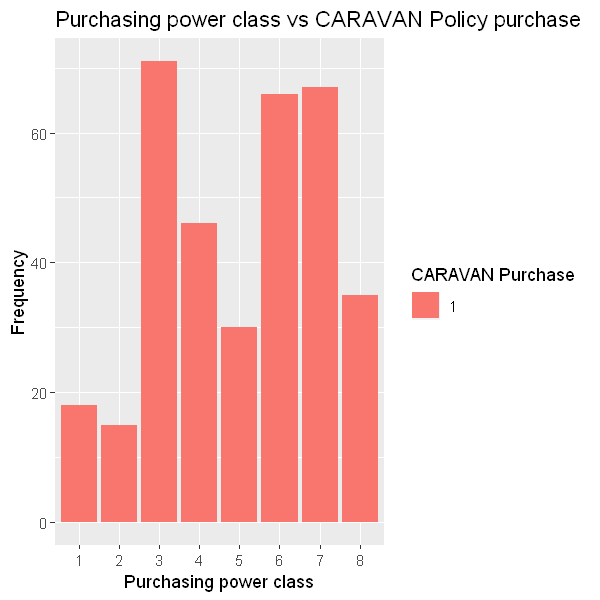

In [47]:
ggplot(df_car[df_selected$CARAVAN==1,], 
       aes(x=as.factor(MKOOPKLA), fill=as.factor(CARAVAN)), fill=CARAVAN) + 
geom_bar() +ylab("Frequency") +
xlab("Purchasing power class") + 
ggtitle("Purchasing power class vs CARAVAN Policy purchase") +
scale_fill_discrete(name = "CARAVAN Purchase")

This shows that, customers with 3,6,7 purchasing class are more likely to buy a CARAVAN policy. 

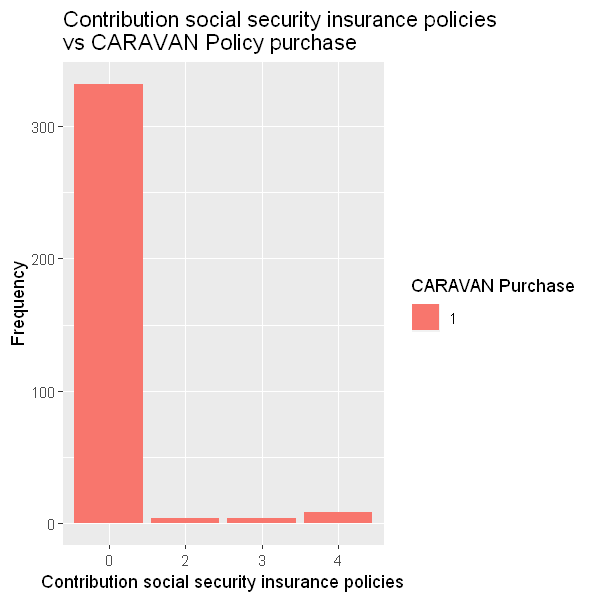

In [48]:
ggplot(df_car[df_selected$CARAVAN==1,], 
       aes(x=as.factor(PBYSTAND), fill=as.factor(CARAVAN)), fill=CARAVAN) + 
geom_bar() +ylab("Frequency") +
xlab("Contribution social security insurance policies") + 
ggtitle("Contribution social security insurance policies 
vs CARAVAN Policy purchase") +
scale_fill_discrete(name = "CARAVAN Purchase")

In the above plot we notice that, a person who doesn't buy a Social security insurance is more likely to buy a Caravan policy. 

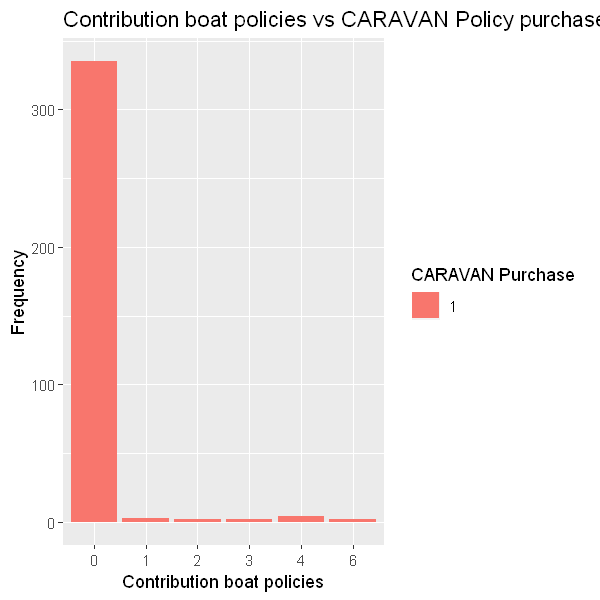

In [49]:
ggplot(df_car[df_selected$CARAVAN==1,], 
       aes(x=as.factor(PPLEZIER), fill=as.factor(CARAVAN)), fill=CARAVAN) + 
geom_bar() +ylab("Frequency") +
xlab("Contribution boat policies") + 
ggtitle("Contribution boat policies vs CARAVAN Policy purchase") +
scale_fill_discrete(name = "CARAVAN Purchase")

The customers who have not bought a boat policy are likely to buy a Caravan policy. 

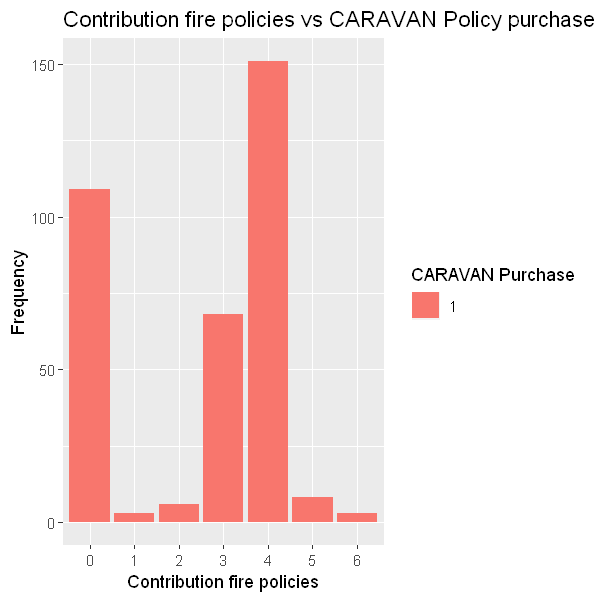

In [50]:
ggplot(df_car[df_selected$CARAVAN==1,], 
       aes(x=as.factor(PBRAND), fill=as.factor(CARAVAN)), fill=CARAVAN) + 
geom_bar() +ylab("Frequency") +
xlab("Contribution fire policies") + 
ggtitle("Contribution fire policies vs CARAVAN Policy purchase") +
scale_fill_discrete(name = "CARAVAN Purchase")

Intrestingly, if the contribution in the fire policy is higher, the chances of person buying the Caravan policy increases. 

Based on the above plots, we get to know some of the qualities of the customers who purchased the Caravan policy. THis could be one of the starting point for the Marketing team to do a targeted marketing. These atributes have a significant impact on the on the customer buying the Caravan policy. 

## 6. Conclusion <a class="anchor" id="sec_6"></a>

Based on the models built, given a marketing team in the business scenario, they are always eager to capture most number of people by targeting the minimum set. In this case, they have the capacity of targeting 800 people, and then the ROSE sampling method seems to be performing the best with this scenario as shown in the table in the previous sections. 

Marketing team can also make use of the some of the patterns that are found in the previous section to incorporate some business rule on the predictions made and make the targeting better. 

## 7. References <a class="anchor" id="sec_7"></a>

* Monash Moodle for FIT5149 https://lms.monash.edu/course/view.php?id=50752
* Data Description http://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html
* Caravan Insurance Challenge: RF (R) https://www.kaggle.com/aldoabdn/caravan-insurance-challenge-rf-r
* PROJECT - INSURANCE COMPANY BENCHMARK CoIL 2000 https://rpubs.com/g_k_s_rajkumar/115458
* Calculating AUPR in R https://stats.stackexchange.com/questions/10501/calculating-aupr-in-r
* The Relationship Between Precision-Recall and ROC Curves https://www.biostat.wisc.edu/~page/rocpr.pdf
* Adding a column to a data.frame https://stackoverflow.com/questions/10150579/adding-a-column-to-a-data-frame/10152029
* Plot table objects with ggplot? https://stackoverflow.com/questions/26788049/plot-table-objects-with-ggplot
* How to put labels over geom_bar in R with ggplot2 https://stackoverflow.com/questions/6455088/how-to-put-labels-over-geom-bar-in-r-with-ggplot2
* How to sort a matrix/data frame in R https://yihui.name/cn/2006/10/how-to-sort-a-matrixdata-frame-in-r/
* randomForest https://www.rdocumentation.org/packages/randomForest/versions/4.6-14/topics/randomForest
* posterior probabilities from lda.predict https://stat.ethz.ch/pipermail/r-help/2014-August/421272.html
* How to split a data set to do 10-fold cross validation https://stats.stackexchange.com/questions/61090/how-to-split-a-data-set-to-do-10-fold-cross-validation
* How to split data into training/testing sets using sample function https://stackoverflow.com/questions/17200114/how-to-split-data-into-training-testing-sets-using-sample-function
* Google's R Style Guide https://google.github.io/styleguide/Rguide.xml#functiondocumentation
* How to temporarily supress warnings in R https://stackoverflow.com/questions/36474556/how-to-temporarily-supress-warnings-in-r